In [1]:
import h5py
import numpy as np
import pandas as pd

In [2]:
import scipy.signal as sig
from scipy.fft import fft, fftfreq

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
N_SAMPLES = 800000

In [5]:
arrays = {}
with h5py.File("./data/Group1/group1_subset_1.mat", 'r') as f:
    for k, v in f.items():
        arrays[k] = np.array(v)

In [6]:
arrays.keys()

dict_keys(['#refs#', '#subsystem#', 'FInfo', 'group1_radarStatusSubset_1', 'group1_waveformSubset_1', 'group1_waveformTableSubset_1'])

In [7]:
# arrays['group1_waveformTableSubset_1']

# arrays['group1_radarStatusSubset_1']

# arrays['group1_waveformSubset_1']

# arrays['group1_waveformTableSubset_1']

# arrays['group1_waveformSubset_1'][0]

In [76]:
arrays['group1_radarStatusSubset_1']

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [8]:
arrays['group1_waveformSubset_1'].shape

(200, 800000)

In [96]:
arrays['group1_radarStatusSubset_1'][10]

array([1], dtype=uint8)

In [107]:
wave_no_radar = arrays['group1_waveformSubset_1'][3]
wave_radar = arrays['group1_waveformSubset_1'][2]

In [108]:
wave_no_radar = wave_no_radar[:N_SAMPLES]
wave_radar = wave_radar[:N_SAMPLES]

In [109]:
wave_no_radar = [x + 1j*y for (x,y) in wave_no_radar]
wave_radar = [x + 1j*y for (x,y) in wave_radar]

In [110]:
t = np.arange(N_SAMPLES)

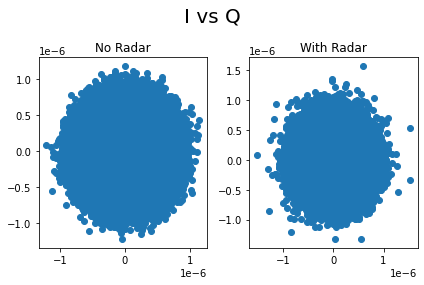

In [111]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('I vs Q', fontsize=20)

x_no_radar = [a.real for a in wave_no_radar]
y_no_radar = [a.imag for a in wave_no_radar]
ax[0].set_title('No Radar')
ax[0].scatter(x_no_radar, y_no_radar);

x_radar = [a.real for a in wave_radar]
y_radar = [a.imag for a in wave_radar]
ax[1].set_title('With Radar')
ax[1].scatter(x_radar, y_radar);
fig.tight_layout()
plt.show()

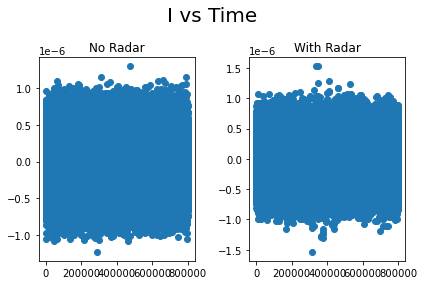

In [14]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('I vs Time', fontsize=20)

ax[0].set_title('No Radar')
ax[0].scatter(t, x_no_radar);

ax[1].set_title('With Radar')
ax[1].scatter(t, x_radar);
fig.tight_layout()
plt.show()

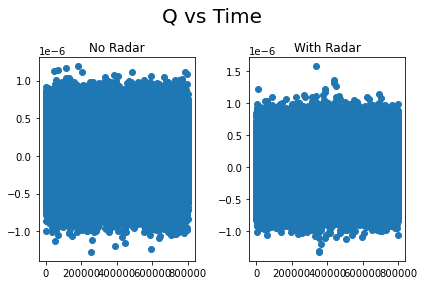

In [15]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Q vs Time', fontsize=20)

ax[0].set_title('No Radar')
ax[0].scatter(t, y_no_radar);

ax[1].set_title('With Radar')
ax[1].scatter(t, y_radar);
fig.tight_layout()
plt.show()

In [48]:
fs = 10e7

In [77]:
nfft = 2**10
n_overlap = 1000

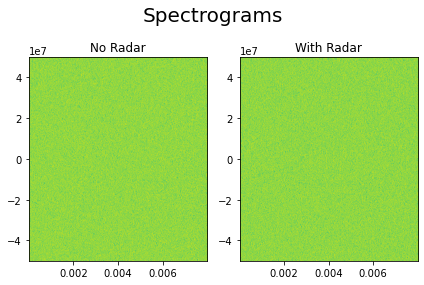

In [78]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Spectrograms', fontsize=20)

ax[0].set_title('No Radar')
ax[0].specgram(wave_no_radar, Fs = fs, NFFT=nfft, noverlap=n_overlap);

ax[1].set_title('With Radar')
ax[1].specgram(wave_radar, Fs = fs, NFFT=nfft, noverlap=n_overlap);
fig.tight_layout()
plt.show()

In [81]:
wave_no_radar_2 = [x.real for x in wave_no_radar]
wave_radar_2 = [x.real for x in wave_radar]

In [ ]:
nfft = 2**10
n_overlap = 1000

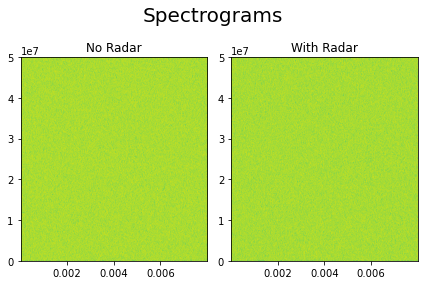

In [82]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Spectrograms', fontsize=20)

ax[0].set_title('No Radar')
ax[0].specgram(wave_no_radar_2, Fs = fs, NFFT=nfft, noverlap=n_overlap);

ax[1].set_title('With Radar')
ax[1].specgram(wave_radar_2, Fs = fs, NFFT=nfft, noverlap=n_overlap);
fig.tight_layout()
plt.show()

In [18]:
SAMPLE_RATE = 10
DURATION = 8*10e3

In [19]:
N = int(SAMPLE_RATE * DURATION)

yf = fft(wave_no_radar)
xf = fftfreq(N, 1 / SAMPLE_RATE)

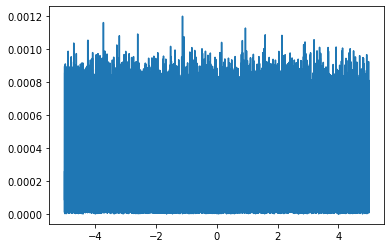

In [20]:
plt.plot(xf, np.abs(yf))
plt.show()